Initial Discovery

In [1]:
import pandas as pd
import numpy as np

file = "/Users/ruiqiansun/team7/data/raw/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file)

In [2]:
df.drop(columns=['id'], inplace = True)

In [3]:
# impute BMI
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

['bmi']


In [4]:
print(df['bmi'])

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64


In [5]:
nan_per_column = df.isna().sum()
print("NaN per column:\n", nan_per_column)

NaN per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


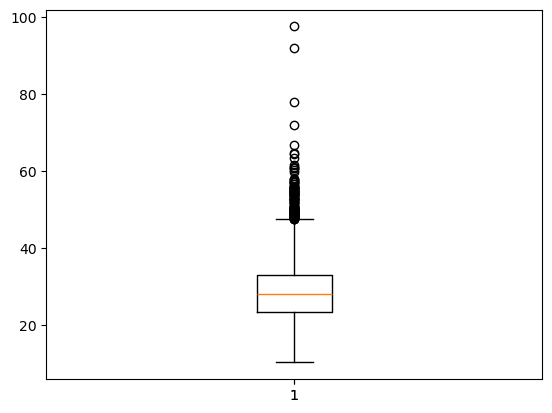

In [6]:
import matplotlib.pyplot as plt

# potential task: predict the value of BMI for missing values
plt.boxplot(df['bmi'].dropna()) 
plt.boxplot(df['bmi'])
plt.show()

In [7]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

/var/folders/fy/b43c2mpd0qlcmlv3s2hy_3vc0000gn/T/ipykernel_85730/2646885692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].mean(), inplace=True)


In [8]:
df.shape

(5110, 11)

In [9]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [21]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [ ]:
# need to one-hot the catergoricals
X_numerical = X.select_dtypes(include=['int64', 'float64'])
print(X_numerical.dtypes)

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
dtype: object


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_numerical)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X_numerical, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 5)
(4088,)
(1022, 5)
(1022,)


In [25]:
from sklearn.linear_model import LogisticRegression

# Random Forest - Neethila
# Decision Tree - Devangi
# KNN - Catherine
# Log Reg - Rui Qian Sun 
# - Mahbub
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

In [28]:
counts = np.bincount(y_pred)

print(counts[0])

1022


In [29]:
print(y_test.value_counts())

stroke
0    972
1     50
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# check log reg requirements, dependent is binary? multicollinerarity? linear relationship of continous predictors? independent? outliers?
# scatter plot the continuous variables?

0.9510763209393346
[[972   0]
 [ 50   0]]
